<h1>Lab 09</h1>
<h4>Name : Ambalia Harshit</h4>
<h4>Roll No. : MT001</h4>

<h3>AIM : Suppot Vector Machine</h3>

# Lab Question

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
column_names = ['Mean_integrated', 'Standard_deviation_integrated', 'Excess_integrated', 'Skewness_integrated', 'Mean_DM', 'Standard_deviation_DM', 'Excess_DM', 'Skewness_DM', 'target_class']
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_Lab_09_Dataset/pulsar_data_train.csv', names=column_names)
df.columns = column_names
df = df.drop(0, axis=0)
df.reset_index(drop=True, inplace=True)
df.head()

,Mean_integrated,Standard_deviation_integrated,Excess_integrated,Skewness_integrated,Mean_DM,Standard_deviation_DM,Excess_DM,Skewness_DM,target_class
0,121.15625,48.37297113,0.375484665,-0.013165488999999999,3.168896321,18.399366600000004,7.449874148999999,65.15929771,0.0
1,76.96875,36.17555664,0.71289786,3.3887185630000003,2.399665552,17.57099693,9.414652256,102.7229747,0.0
2,130.5859375,53.22953353,0.133408289,-0.297241641,2.743311037,22.36255299,8.508363784,74.03132420000001,0.0
3,156.3984375,48.86594223,-0.215988596,-0.171293649,17.47157191,NaN,2.9580659430000003,7.197841911,0.0
4,84.8046875,36.11765898,0.825012787,3.274125373,2.7901337789999996,20.61800857,8.405008383,76.29112787,0.0


In [3]:
distinct_values = df['target_class'].unique()
distinct_values

array(['0.0', '1.0'], dtype=object)

In [4]:
import numpy as np
def handle_missing_column_using_average(df, column_name):
    df[column_name] = df[column_name].replace(to_replace='.*\?.*', value=np.nan, regex=True)
    missing_indices = df[df[column_name].isnull()].index
    non_missing_indices = df[df[column_name].notnull()].index

    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    df[column_name] = df[column_name].astype(float)

    if len(missing_indices) < len(non_missing_indices):
        column_mean = df.loc[non_missing_indices, column_name].mean()
        df[column_name] = df[column_name].fillna(column_mean)
    else:
        print('Dropping the column')
        df = df.drop(columns=[column_name])
    return df

In [5]:
handle_missing_from = ['Mean_integrated', 'Standard_deviation_integrated', 'Excess_integrated', 'Skewness_integrated', 'Mean_DM', 'Standard_deviation_DM', 'Excess_DM', 'Skewness_DM', 'target_class']
for column_name in handle_missing_from:
    df = handle_missing_column_using_average(df, column_name)

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def svm_classification(X_train, y_train, X_test, y_test, kernel_type = "rbf", C_value = 1.0):
    svm_classifier = SVC(kernel=kernel_type, C=C_value)
    svm_classifier.fit(X_train, y_train)
    spv = svm_classifier.support_vectors_

    predictions = svm_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy, spv

In [7]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['target_class'])
y = df['target_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
kernel_type = "Default"
C_value = "Default"
accuracy, spv = svm_classification(X_train, y_train, X_test, y_test)
print('--------------------------------'+ ' Kernel type : '+ kernel_type + ', C = ' + str(C_value) +' --------------------------------')
print("Accuracy  : " + str(accuracy))
print("Length of support vectors : " + str(len(spv)))
print("Support Vectors are : " + str(spv))

-------------------------------- Kernel type : Default, C = Default --------------------------------
Accuracy  : 0.9712689545091779
Length of support vectors : 798
Support Vectors are : [[104.6328125   39.42791506   0.7203118  ...  56.12704133   2.43227554
    4.55664701]
 [ 99.5234375   38.97173752   0.47854775 ...  84.22760906  -0.26243038
   -1.83975556]
 [ 86.5390625   40.53083362   0.57331779 ...  30.62361678   5.20642242
   27.59424509]
 ...
 [ 78.21875     40.63787056   0.47854775 ...  54.93860141   2.49255747
    4.84307024]
 [ 82.3828125   46.59803528   0.47854775 ...  26.35131817  -0.71019292
   -0.52754931]
 [ 68.46875     40.7509466    2.09317056 ...  32.9225058   -0.73159583
    0.30930043]]


In [9]:
kernel_type = "linear"
C_values = [1.0, 100.0, 10000.0]
linear_accuracy = []
for C_value in C_values:
    print('--------------------------------'+ ' Kernel type : '+ kernel_type + ', C = ' + str(C_value) +' --------------------------------')
    accuracy, spv = svm_classification(X_train, y_train, X_test, y_test, kernel_type, C_value)
    linear_accuracy.append(accuracy)
    print("Accuracy  : " + str(accuracy))
    print("Length of support vectors : " + str(len(spv)))
    print("Support Vectors are : " + str(spv))
    print()

-------------------------------- Kernel type : linear, C = 1.0 --------------------------------
Accuracy  : 0.9776536312849162
Length of support vectors : 619
Support Vectors are : [[104.6328125   39.42791506   0.7203118  ...  56.12704133   2.43227554
    4.55664701]
 [ 83.890625    35.33792986   0.86927906 ...  18.12769733   9.69823442
  104.8946747 ]
 [ 80.109375    40.66809913   0.89818377 ...  30.8448161    5.22924537
   27.46113518]
 ...
 [ 78.21875     40.63787056   0.47854775 ...  54.93860141   2.49255747
    4.84307024]
 [ 82.3828125   46.59803528   0.47854775 ...  26.35131817  -0.71019292
   -0.52754931]
 [ 68.46875     40.7509466    2.09317056 ...  32.9225058   -0.73159583
    0.30930043]]

-------------------------------- Kernel type : linear, C = 100.0 --------------------------------
Accuracy  : 0.9780526735833999
Length of support vectors : 520
Support Vectors are : [[104.6328125   39.42791506   0.7203118  ...  56.12704133   2.43227554
    4.55664701]
 [ 80.109375    40.6

In [10]:
kernel_type = "poly"
C_values = [1.0, 100.0, 10000.0]
poly_accuracy = []
for C_value in C_values:
    print('--------------------------------'+ ' Kernel type : '+ kernel_type + ', C = ' + str(C_value) +' --------------------------------')
    accuracy, spv = svm_classification(X_train, y_train, X_test, y_test, kernel_type, C_value)
    poly_accuracy.append(accuracy)
    print("Accuracy  : " + str(accuracy))
    print("Length of support vectors : " + str(len(spv)))
    print("Support Vectors are : " + str(spv))
    print()

-------------------------------- Kernel type : poly, C = 1.0 --------------------------------
Accuracy  : 0.9720670391061452
Length of support vectors : 969
Support Vectors are : [[104.6328125   39.42791506   0.7203118  ...  56.12704133   2.43227554
    4.55664701]
 [ 99.5234375   38.97173752   0.47854775 ...  84.22760906  -0.26243038
   -1.83975556]
 [ 86.5390625   40.53083362   0.57331779 ...  30.62361678   5.20642242
   27.59424509]
 ...
 [ 78.21875     40.63787056   0.47854775 ...  54.93860141   2.49255747
    4.84307024]
 [ 82.3828125   46.59803528   0.47854775 ...  26.35131817  -0.71019292
   -0.52754931]
 [ 68.46875     40.7509466    2.09317056 ...  32.9225058   -0.73159583
    0.30930043]]

-------------------------------- Kernel type : poly, C = 100.0 --------------------------------
Accuracy  : 0.9776536312849162
Length of support vectors : 723
Support Vectors are : [[104.6328125   39.42791506   0.7203118  ...  56.12704133   2.43227554
    4.55664701]
 [ 99.5234375   38.97173

In [11]:
kernel_type = "sigmoid"
C_values = [1.0, 100.0, 10000.0]
sigmoid_accuracy = []
for C_value in C_values:
    print('--------------------------------'+ ' Kernel type : '+ kernel_type + ', C = ' + str(C_value) +' --------------------------------')
    accuracy, spv = svm_classification(X_train, y_train, X_test, y_test, kernel_type, C_value)
    sigmoid_accuracy.append(accuracy)
    print("Accuracy  : " + str(accuracy))
    print("Length of support vectors : " + str(len(spv)))
    print("Support Vectors are : " + str(spv))
    print()

-------------------------------- Kernel type : sigmoid, C = 1.0 --------------------------------
Accuracy  : 0.9074221867517956
Length of support vectors : 883
Support Vectors are : [[ 9.95234375e+01  3.89717375e+01  4.78547749e-01 ...  8.42276091e+01
  -2.62430376e-01 -1.83975556e+00]
 [ 1.32976562e+02  4.58447558e+01  1.41114220e-01 ...  9.04355128e+01
   2.47558663e-01 -1.86982359e+00]
 [ 1.24640625e+02  5.01706049e+01  3.28036668e-01 ...  2.63513182e+01
   1.96964490e+01  4.80272240e+02]
 ...
 [ 7.82187500e+01  4.06378706e+01  4.78547749e-01 ...  5.49386014e+01
   2.49255747e+00  4.84307024e+00]
 [ 4.18906250e+01  2.86834105e+01  4.70713392e+00 ...  4.40377782e+01
   3.73938748e+00  1.36132958e+01]
 [ 8.23828125e+01  4.65980353e+01  4.78547749e-01 ...  2.63513182e+01
  -7.10192918e-01 -5.27549306e-01]]

-------------------------------- Kernel type : sigmoid, C = 100.0 --------------------------------
Accuracy  : 0.9034317637669593
Length of support vectors : 851
Support Vectors are

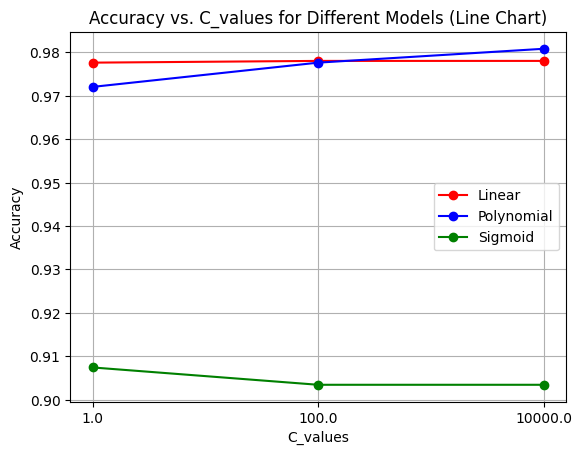

In [31]:
import matplotlib.pyplot as plt

plt.xlabel("C_values")
plt.ylabel("Accuracy")
bar_labels = ["1.0", "100.0", "10000.0"]
colors = ["red", "blue", "green"]
model = ["Linear", "Polynomial", "Sigmoid"]
accuracy_model1 = linear_accuracy
accuracy_model2 = poly_accuracy
accuracy_model3 = sigmoid_accuracy

# Plot line chart for each model
plt.plot(bar_labels, accuracy_model1, color=colors[0], marker='o', label=model[0])
plt.plot(bar_labels, accuracy_model2, color=colors[1], marker='o', label=model[1])
plt.plot(bar_labels, accuracy_model3, color=colors[2], marker='o', label=model[2])

plt.legend()
plt.title("Accuracy vs. C_values for Different Models (Line Chart)")
plt.grid(True)
plt.show()


# EXTRA 01 :    
Converting high dimension data into 2D data and then applying SVM Classifier

In [13]:
# Converting multidimensional data into 2-D data
from sklearn.decomposition import PCA
import pandas as pd
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)
df_2d = pd.DataFrame(data=X_2d, columns=['new1', 'new2'])
df_2d['target_class'] = y
print(df_2d.head())

        new1       new2  target_class
0 -37.654084 -21.228464           0.0
1  -2.147997   6.168502           0.0
2 -28.808394 -23.846353           0.0
3 -95.991713 -33.115267           0.0
4 -28.321485  -0.067867           0.0


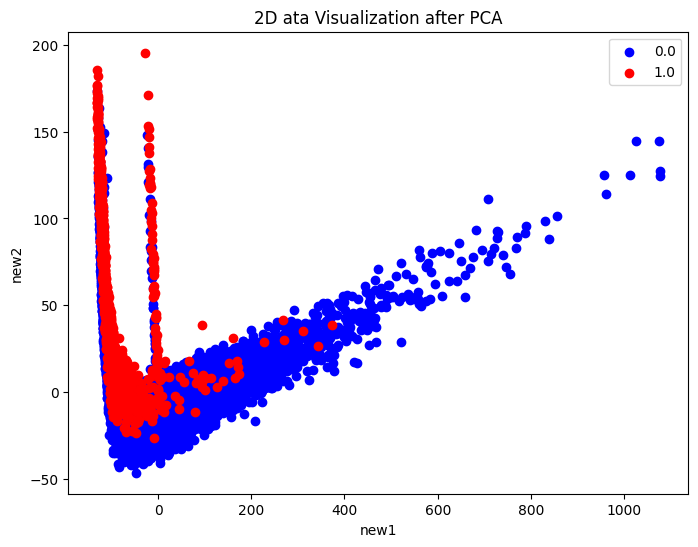

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
targets = df_2d['target_class'].unique()
colors = ['b', 'r']
for target, color in zip(targets, colors):
    indices = df_2d['target_class'] == target
    plt.scatter(df_2d.loc[indices, 'new1'], df_2d.loc[indices, 'new2'], c=color, label=target)

plt.xlabel('new1')
plt.ylabel('new2')
plt.title('2D ata Visualization after PCA')
plt.legend()
plt.show()

In [15]:
X = df_2d.drop(columns=['target_class'])
y = df_2d['target_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
kernel_type = "linear"
C_values = [1.0, 100.0, 10000.0]
for C_value in C_values:
    print('--------------------------------'+ ' Kernel type : '+ kernel_type + ', C = ' + str(C_value) +' --------------------------------')
    accuracy, spv = svm_classification(X_train, y_train, X_test, y_test, kernel_type, C_value)
    print("Accuracy  : " + str(accuracy))
    print("Length of support vectors : " + str(len(spv)))
    print("Support Vectors are : " + str(spv))
    print()

-------------------------------- Kernel type : linear, C = 1.0 --------------------------------
Accuracy  : 0.9150039904229849
Length of support vectors : 1578
Support Vectors are : [[-104.14854596    7.13163502]
 [-121.76966948   77.18482886]
 [-119.2307663    49.57489198]
 ...
 [-116.43080974   81.6061911 ]
 [-111.10705532   40.97518967]
 [-117.41752803   96.85254998]]

-------------------------------- Kernel type : linear, C = 100.0 --------------------------------
Accuracy  : 0.9130087789305666
Length of support vectors : 1387
Support Vectors are : [[-104.14854596    7.13163502]
 [ -93.99602833   -8.14107513]
 [-121.76966948   77.18482886]
 ...
 [-116.43080974   81.6061911 ]
 [-111.10705532   40.97518967]
 [-117.41752803   96.85254998]]

-------------------------------- Kernel type : linear, C = 10000.0 --------------------------------
Accuracy  : 0.9142059058260176
Length of support vectors : 1178
Support Vectors are : [[-104.14854596    7.13163502]
 [-121.76966948   77.18482886]


# EXTRA 02 :    
Choosing highly related columns from dataset and creating SVM classifier using that

In [17]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assuming df is your DataFrame with the given column names
column_names = ['Mean_integrated', 'Standard_deviation_integrated', 'Excess_integrated', 'Skewness_integrated', 'Mean_DM', 'Standard_deviation_DM', 'Excess_DM', 'Skewness_DM', 'target_class']

# Read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_Lab_09_Dataset/pulsar_data_train.csv', names=column_names)
df.columns = column_names
df = df.drop(0, axis=0)
df.reset_index(drop=True, inplace=True)

# Dropping column where target_classis NaN
df = df.dropna(subset=['target_class'])

# Separate features and target variable
X = df.drop(columns=['target_class'])
y = df['target_class']

In [18]:
import numpy as np
def handle_missing_column_using_average(df, column_name):
    df[column_name] = df[column_name].replace(to_replace='.*\?.*', value=np.nan, regex=True)
    missing_indices = df[df[column_name].isnull()].index
    non_missing_indices = df[df[column_name].notnull()].index

    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    df[column_name] = df[column_name].astype(float)

    if len(missing_indices) < len(non_missing_indices):
        column_mean = df.loc[non_missing_indices, column_name].mean()
        df[column_name] = df[column_name].fillna(column_mean)
    else:
        print('Dropping the column')
        df = df.drop(columns=[column_name])
    return df

In [19]:
handle_missing_from = ['Mean_integrated', 'Standard_deviation_integrated', 'Excess_integrated', 'Skewness_integrated', 'Mean_DM', 'Standard_deviation_DM', 'Excess_DM', 'Skewness_DM']
for column_name in handle_missing_from:
    X = handle_missing_column_using_average(X, column_name)

In [20]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model to determine feature importance
rf_classifier.fit(X, y)

# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 2 most relevant columns
top_2_features = sorted_feature_importance.head(2)

print("Top 2 most relevant features:")
print(top_2_features)

Top 2 most relevant features:
               Feature  Importance
2    Excess_integrated    0.292572
3  Skewness_integrated    0.248842


In [21]:
X = df[['Excess_integrated', 'Skewness_integrated']]
y = df['target_class']

In [22]:
handle_missing_from = ['Excess_integrated', 'Skewness_integrated']
for column_name in handle_missing_from:
    X = handle_missing_column_using_average(X, column_name)

<ipython-input-18-9b124a00fd07>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].replace(to_replace='.*\?.*', value=np.nan, regex=True)
<ipython-input-18-9b124a00fd07>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
<ipython-input-18-9b124a00fd07>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("For C=" + str(1.0) + ", Accuracy is : " + str(accuracy))

For C=1.0, Accuracy is : 0.9736632083000798


In [25]:
model = SVC(kernel='linear', C=100.0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("For C=" + str(100.0) + ", Accuracy is : " + str(accuracy))

For C=100.0, Accuracy is : 0.9736632083000798


In [26]:
model = SVC(kernel='linear', C=10000.0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("For C=" + str(10000.0) + ", Accuracy is : " + str(accuracy))

For C=10000.0, Accuracy is : 0.9736632083000798
